# EE634 Intro to Neural Networks
# Assignment #3: TensorFlow
# Zachary Chou
## Fall 2023

In [2]:
# Import libraries 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models 
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [3]:
# Avoid kernel crash
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Safety measure since the dataset is working with images and the
# massive size 

In [3]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [5]:
# Checking the images dimensions
display(train_images.shape)
display(test_images.shape)

# Helpful when reshaping the images and setting shaping 
# for building the model

(50000, 32, 32, 3)

(10000, 32, 32, 3)

# CNN

In [18]:
# Pre-process the data before undergoing CNN 
train_images = train_images.reshape(50000, 32, 32, 3)
test_images = test_images.reshape(10000, 32, 32, 3)

train_images = train_images / 255.0
test_images = test_images/255.0

# Confining to the dimensions of each image 
# since it is a 32x32 and a color channel depth of 3 
# Also the /255.0 is used for normalization of the data

In [37]:
# Building the CNN model and compiling to run it  
def create_model():
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model 
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# The process to create the CNN model which has two convolution layers
# that have 64 filters with size 3x3 and an activation function of 
# relu since it is more reliable than the previous sigmoid
# the first convolution layer has the input_shape of 32x32x3 to 
# be the first layer to define an image features 
# The max pooling size of 2x2 is used after each convolution layer
# to reduce computation time 
# flatten is used to convert the previous steps into a 1D vector
# The first dense layer is for high-level feature extraction
# the final dense layer is used since their are 10 classes and 
# a softmax activation function used for class probabilities 
# the adam optimizer is used to adjust learning rate during training 
# the loss function is good for when target values are integers 
# The accuracy is displayed after the model runs 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [38]:
# Showing epoch history
history = model.fit(train_images, train_labels, epochs=6, batch_size=32, validation_split=0.2)

# The number of epochs is choosen since each epoch takes a little longer
# than usual to process 
# the batch size is choosen since it provides smaller computation time and
# reduce overfitting
# the validation split is used to siginify how much of the data will be 
# split into training and testing data

Epoch 1/6
1250/1250 [==============================] - 35s 27ms/step - loss: 1.4557 - accuracy: 0.4771 - val_loss: 1.2403 - val_accuracy: 0.5620
Epoch 2/6
1250/1250 [==============================] - 32s 25ms/step - loss: 1.0956 - accuracy: 0.6151 - val_loss: 1.0439 - val_accuracy: 0.6405
Epoch 3/6
1250/1250 [==============================] - 32s 26ms/step - loss: 0.9609 - accuracy: 0.6637 - val_loss: 0.9997 - val_accuracy: 0.6586
Epoch 4/6
1250/1250 [==============================] - 32s 26ms/step - loss: 0.8513 - accuracy: 0.7005 - val_loss: 0.9222 - val_accuracy: 0.6843
Epoch 5/6
1250/1250 [==============================] - 33s 26ms/step - loss: 0.7611 - accuracy: 0.7338 - val_loss: 0.9115 - val_accuracy: 0.6875
Epoch 6/6
1250/1250 [==============================] - 36s 29ms/step - loss: 0.6883 - accuracy: 0.7577 - val_loss: 0.9189 - val_accuracy: 0.6933


In [39]:
# Save original CNN
model.save('original_CNN')

# Code to load the data for future comparison
# loaded_model = tf.keras.models.load_model('original_CNN')

INFO:tensorflow:Assets written to: original_CNN\assets


INFO:tensorflow:Assets written to: original_CNN\assets


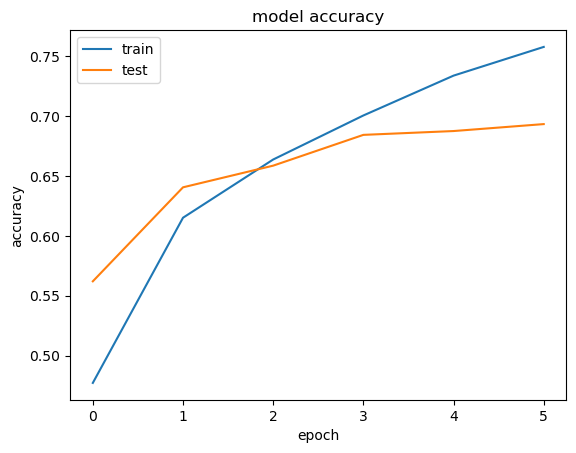

In [42]:
# Model accuracy as a plot for the train and test
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# The graph takes the accuracy data from the epoch runs and displays it visually
# The mode is overfitting quite substantially since there is a large
# gap between the training and testing data at later epochs 
# so the model is not the best at recognizing unseen, testing, data

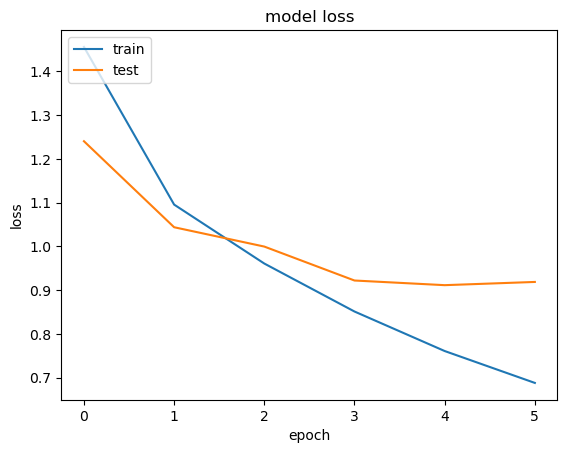

In [43]:
# Model loss over epochs as a plot for the train and test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# the model is overfitting by a significant amount since 
# at later epochs, there is a large gap between the two 
# this suggests that model can preform well on the training data 
# rather than the testing data

In [46]:
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

predictions = model.predict (test_images)
print(predictions.shape, test_labels.shape)

# There is a high test loss accuracy meaning that the model's predictions
# are not matching the actual data
# The test accuracy means that the model is predicting somewhat well 
# on the test samples
# The predictions signify that there are 10,000 test samples for 10 
# possible classes and each sample getting one prediction value

313/313 [==============================] - 3s 10ms/step - loss: 0.9297 - accuracy: 0.6886
Test Loss: 0.9297121167182922
Test Accuracy: 0.6886000037193298
313/313 [==============================] - 4s 10ms/step
(10000, 10) (10000, 1)


In [47]:
# Show the confusion matrix
cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print(cm)

# The matrix shows the diagonal column as the classes and how many 
# the model gets rights while the other values in the rows and columns
# suggest the model getting the image wrong with the respective class
# and what the model actually predicted 

[[747  18  66  14  27   2   9  14  59  44]
 [ 34 746  12  11   4   3  13   2  48 127]
 [ 57   6 601  51 109  43  74  28  18  13]
 [ 23  14  94 488 110 111  92  33  21  14]
 [ 24   3  84  55 677  19  67  54  12   5]
 [ 15   5  92 207  73 472  41  64  21  10]
 [  7   7  51  55  33  13 811   5   9   9]
 [ 17   5  59  36  96  36  13 706   9  23]
 [ 75  21  15  15   6   2   3   4 823  36]
 [ 39  51  15  17   7   4   8  10  34 815]]


In [48]:
# Show the classification report
cr = classification_report(test_labels, np.argmax(predictions, axis=1))
print(cr)

# The report shows the accuracy for each class based on several 
# types of classifications, precision, recall, f1-score, and support

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.85      0.75      0.80      1000
           2       0.55      0.60      0.58      1000
           3       0.51      0.49      0.50      1000
           4       0.59      0.68      0.63      1000
           5       0.67      0.47      0.55      1000
           6       0.72      0.81      0.76      1000
           7       0.77      0.71      0.74      1000
           8       0.78      0.82      0.80      1000
           9       0.74      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



5000
[3, 10, 20, 28, 34, 58, 66, 82, 86, 89]
1/1 [==============================] - 0s 58ms/step


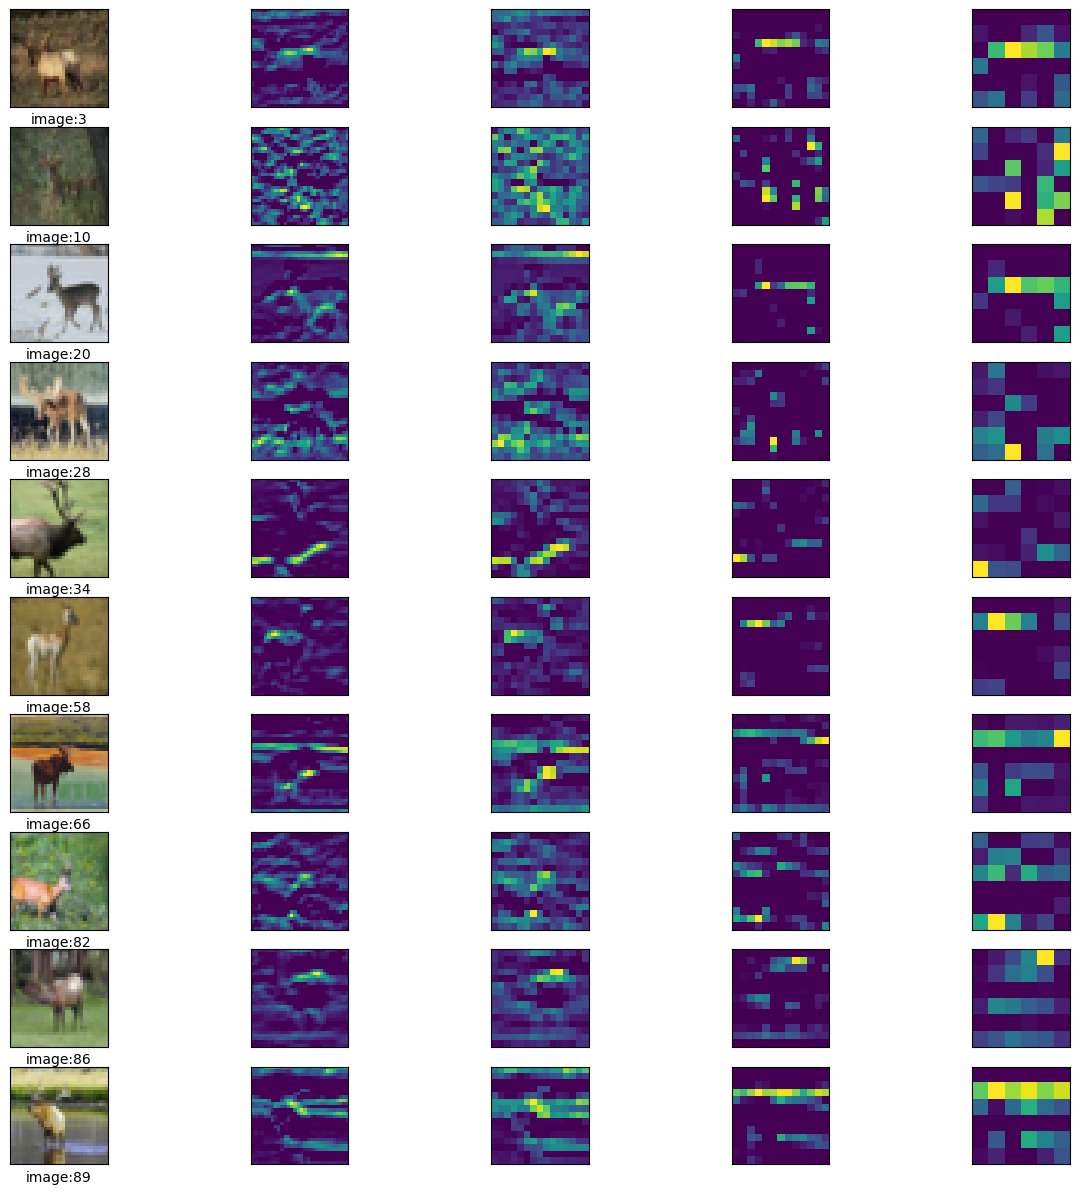

In [84]:
# Visualize feature maps - deer
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
deer_list = [i for i in range(len(train_images)) if train_labels[i] == 4]
print(len(deer_list))

print(deer_list[0:10])
train_labels[deer_list[0:10]]

np.argmax(model.predict(train_images[deer_list[0:10]]), axis=1)

f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])

for idx, k in enumerate(deer_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='viridis')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32, 32, 3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='viridis')
        
# The code takes the intermediate layers and prints a list of the 
# images for the deer class, the label equalling to 4
# The subplot for each image is included and it shows the color map 
# the output shows the 4 intermediate layers and 
# how the model uses the pixles for each layer to get more 
# and more like the image shown in the far left

# The same observation can be made for the frog class and the horse
# class with the frog label being 6 and the horse class being 
# 7 

5000
[0, 19, 22, 23, 25, 72, 95, 103, 104, 117]
1/1 [==============================] - 0s 61ms/step


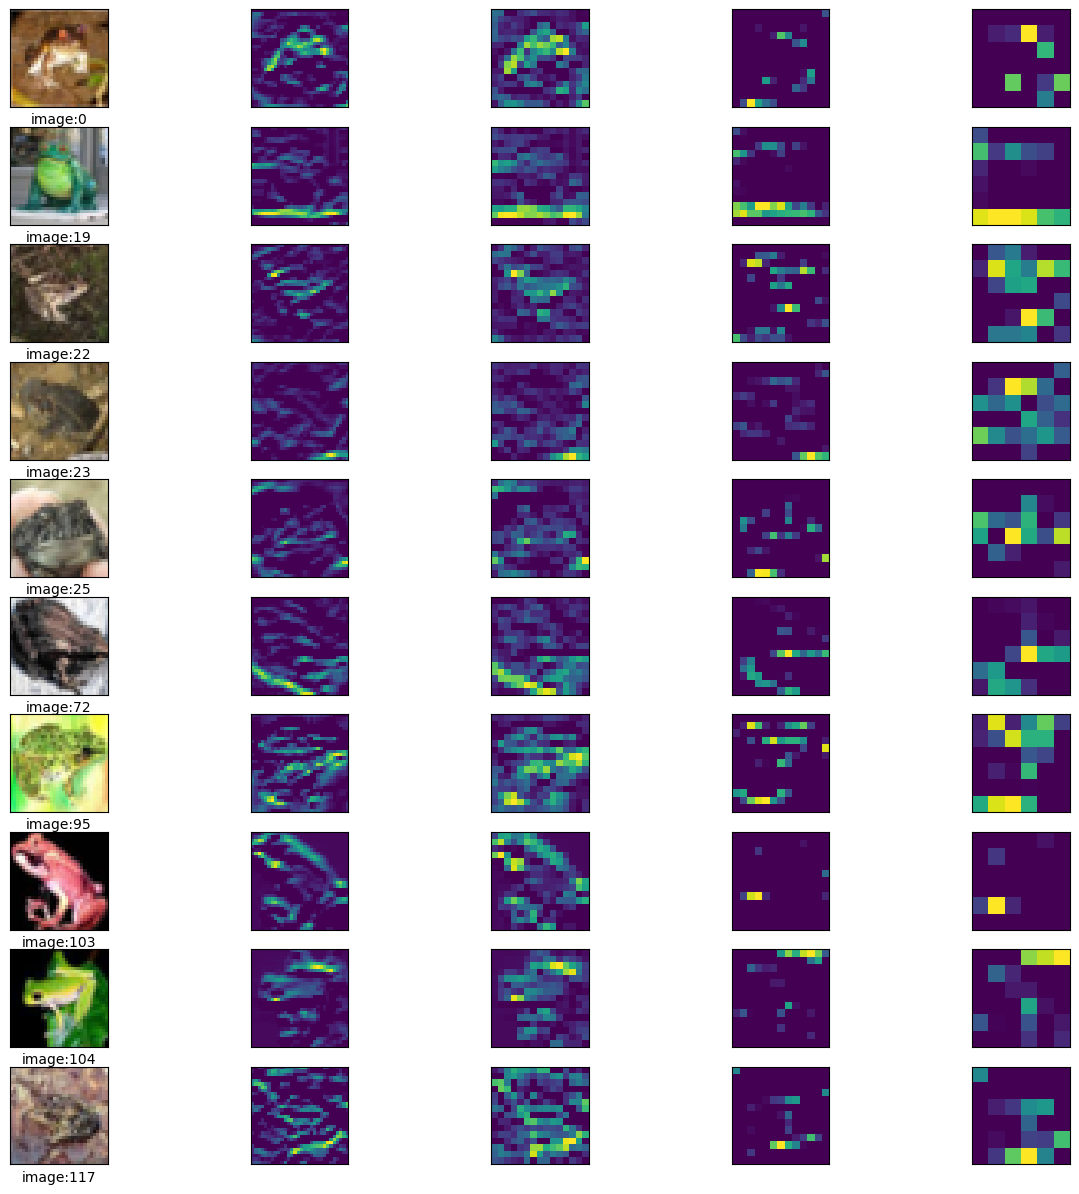

In [85]:
# Visualize feature maps - frog
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
frog_list = [i for i in range(len(train_images)) if train_labels[i] == 6]
print(len(frog_list))

print(frog_list[0:10])
train_labels[frog_list[0:10]]

np.argmax(model.predict(train_images[frog_list[0:10]]), axis=1)

f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])

for idx, k in enumerate(frog_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='viridis')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32, 32, 3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='viridis')

5000
[7, 11, 12, 37, 43, 52, 68, 73, 84, 85]
1/1 [==============================] - 0s 58ms/step


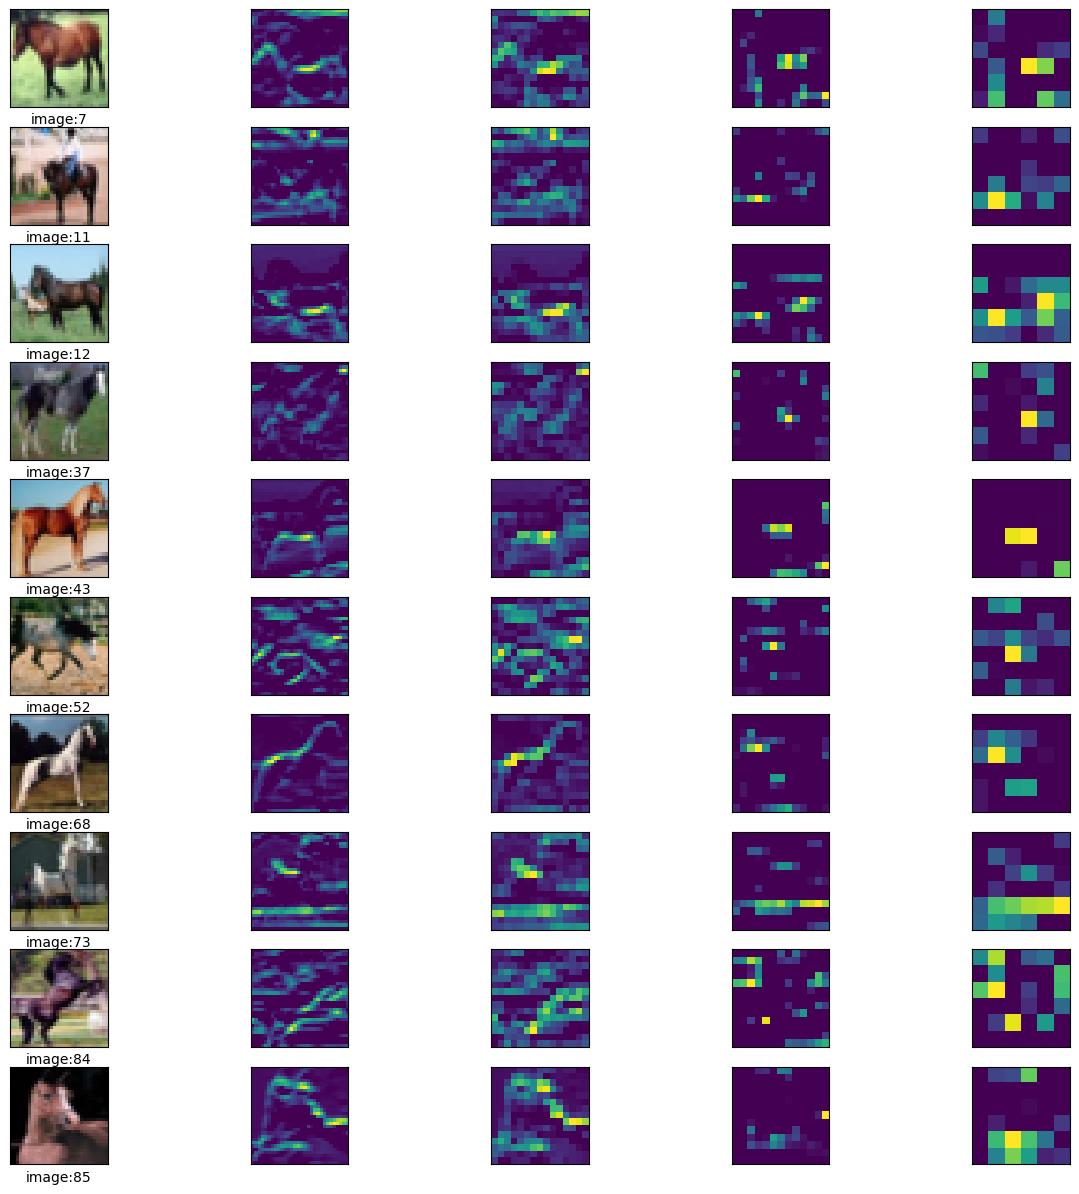

In [86]:
# Visualize feature maps - horse
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
horse_list = [i for i in range(len(train_images)) if train_labels[i] == 7]
print(len(horse_list))

print(horse_list[0:10])
train_labels[horse_list[0:10]]

np.argmax(model.predict(train_images[horse_list[0:10]]), axis=1)

f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])

for idx, k in enumerate(horse_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='viridis')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32, 32, 3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='viridis')

# Dense Model

In [8]:
# Building the dense model and compiling it 
def create_model():
    
    model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  
    layers.Dense(128, activation='relu'),    
    layers.Dropout(0.2),                     
    layers.Dense(64, activation='relu'),    
    layers.Dense(10, activation='softmax')   
])
    return model 
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# The dense model is created by turning the images into a 1D array with the 
# shape of 32x32 and 3 color channels 
# A hidden layer of 128 neurons with the activation function of relu
# the next layer is the dropping of neurons when training to prevent overfitting
# Another hidden layer of 64 neurons
# The output is 10 neurons with 10 possible classes with a 
# softmax activation function 
# the adam optimizer is used to adjust learning rate during training 
# the loss function is good for when target values are integers 
# The accuracy is displayed after the model runs 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Train the model
history = model.fit(train_images, train_labels, epochs=6, batch_size=32, validation_split=0.2)

# The number of epochs is choosen since each epoch takes a little longer
# than usual to process 
# the batch size is choosen since it provides smaller computation time and
# reduce overfitting
# the validation split is used to siginify how much of the data will be 
# split into training and testing data

Epoch 1/6
1250/1250 [==============================] - 6s 4ms/step - loss: 1.6447 - accuracy: 0.4020 - val_loss: 1.6465 - val_accuracy: 0.4042
Epoch 2/6
1250/1250 [==============================] - 9s 8ms/step - loss: 1.6408 - accuracy: 0.4034 - val_loss: 1.6281 - val_accuracy: 0.4151
Epoch 3/6
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6409 - accuracy: 0.4021 - val_loss: 1.6332 - val_accuracy: 0.4104
Epoch 4/6
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6395 - accuracy: 0.4018 - val_loss: 1.5911 - val_accuracy: 0.4292
Epoch 5/6
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6339 - accuracy: 0.4042 - val_loss: 1.6378 - val_accuracy: 0.4065
Epoch 6/6
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6422 - accuracy: 0.4013 - val_loss: 1.6730 - val_accuracy: 0.3964


In [97]:
# Save Dense Model
model.save('Dense_Model')

# Code to load the data for future comparison
# loaded_model_1 = tf.keras.models.load_model('Dense_Model')

INFO:tensorflow:Assets written to: Dense_Model\assets


INFO:tensorflow:Assets written to: Dense_Model\assets


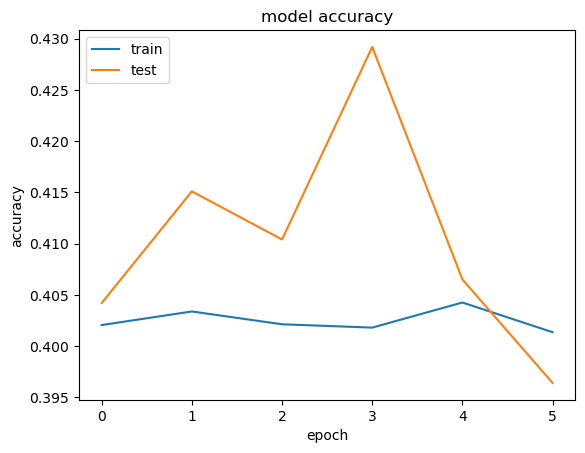

In [98]:
# Model accuracy as a plot for the train and test
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# The graph takes the accuracy data from the epoch runs and displays it visually
# which suggests that the model is underfitting since the testing data 
# is higher than the training data. This is due to the fact that the model
# performs the computations with only neurons at a sequential level which 
# provides the data being too simple or not enough epochs to capture the model behavior.
# Thus, the model does not do to well no the testing and training data

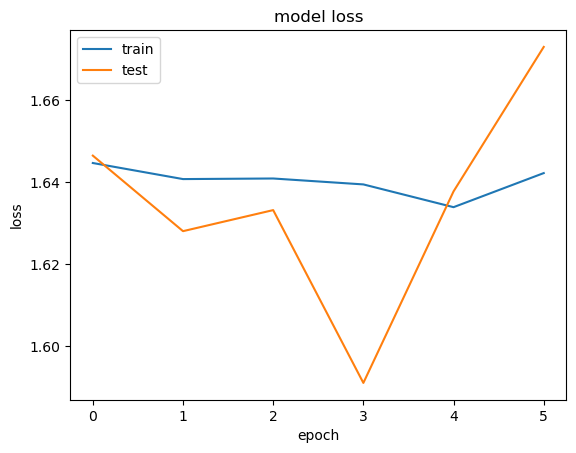

In [99]:
# Model loss over epochs as a plot for the train and test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# The model takes the loss results from the model run to 
# display visually the loss for both the training and testing data over
# a course of epochs
# In general, the model is showing signs of overfitting since 
# the model takes the training data and performs it well compared to the 
# testing data, unseen data. The model has a hard time capturing unseen data

In [100]:
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

predictions = model.predict (test_images)
print(predictions.shape, test_labels.shape)

# There is a high test loss accuracy meaning that the model's predictions
# are not matching the actual data
# The test accuracy means that the model is predicting not so well 
# on the test samples
# The predictions signify that there are 10,000 test samples for 10 
# possible classes and each sample getting one prediction value

313/313 [==============================] - 1s 3ms/step - loss: 1.6642 - accuracy: 0.4024
Test Loss: 1.6642273664474487
Test Accuracy: 0.4023999869823456
313/313 [==============================] - 1s 2ms/step
(10000, 10) (10000, 1)


In [101]:
# Show the confusion matrix
cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print(cm)

# The matrix shows the diagonal column as the classes and how many 
# the model gets rights while the other values in the rows and columns
# suggest the model getting the image wrong with the respective class
# and what the model actually predicted 

[[283  27 134 100  46  20  28  60 231  71]
 [ 18 515  18  87  26  12  40  42  88 154]
 [ 64  21 155 119 321  41 173  61  23  22]
 [  9  18  74 317 119 117 264  30  28  24]
 [ 24   6  72 113 496  11 186  47  23  22]
 [ 10  10  63 273 149 247 174  36  24  14]
 [  3  10  37 134 221  31 539  14   5   6]
 [ 25   9  65 128 191  44  57 388  25  68]
 [ 55  57  15  85  18  36  30  14 594  96]
 [ 16 138   7 101  24  16  55  46 107 490]]


In [109]:
# Show the classification report
cr = classification_report(test_labels, np.argmax(predictions, axis=1))
print(cr)

# The report shows the accuracy for each class based on several 
# types of classifications, precision, recall, f1-score, and support

              precision    recall  f1-score   support

           0       0.56      0.28      0.38      1000
           1       0.64      0.52      0.57      1000
           2       0.24      0.15      0.19      1000
           3       0.22      0.32      0.26      1000
           4       0.31      0.50      0.38      1000
           5       0.43      0.25      0.31      1000
           6       0.35      0.54      0.42      1000
           7       0.53      0.39      0.45      1000
           8       0.52      0.59      0.55      1000
           9       0.51      0.49      0.50      1000

    accuracy                           0.40     10000
   macro avg       0.43      0.40      0.40     10000
weighted avg       0.43      0.40      0.40     10000



5000
[3, 10, 20, 28, 34, 58, 66, 82, 86, 89]
1/1 [==============================] - 0s 57ms/step


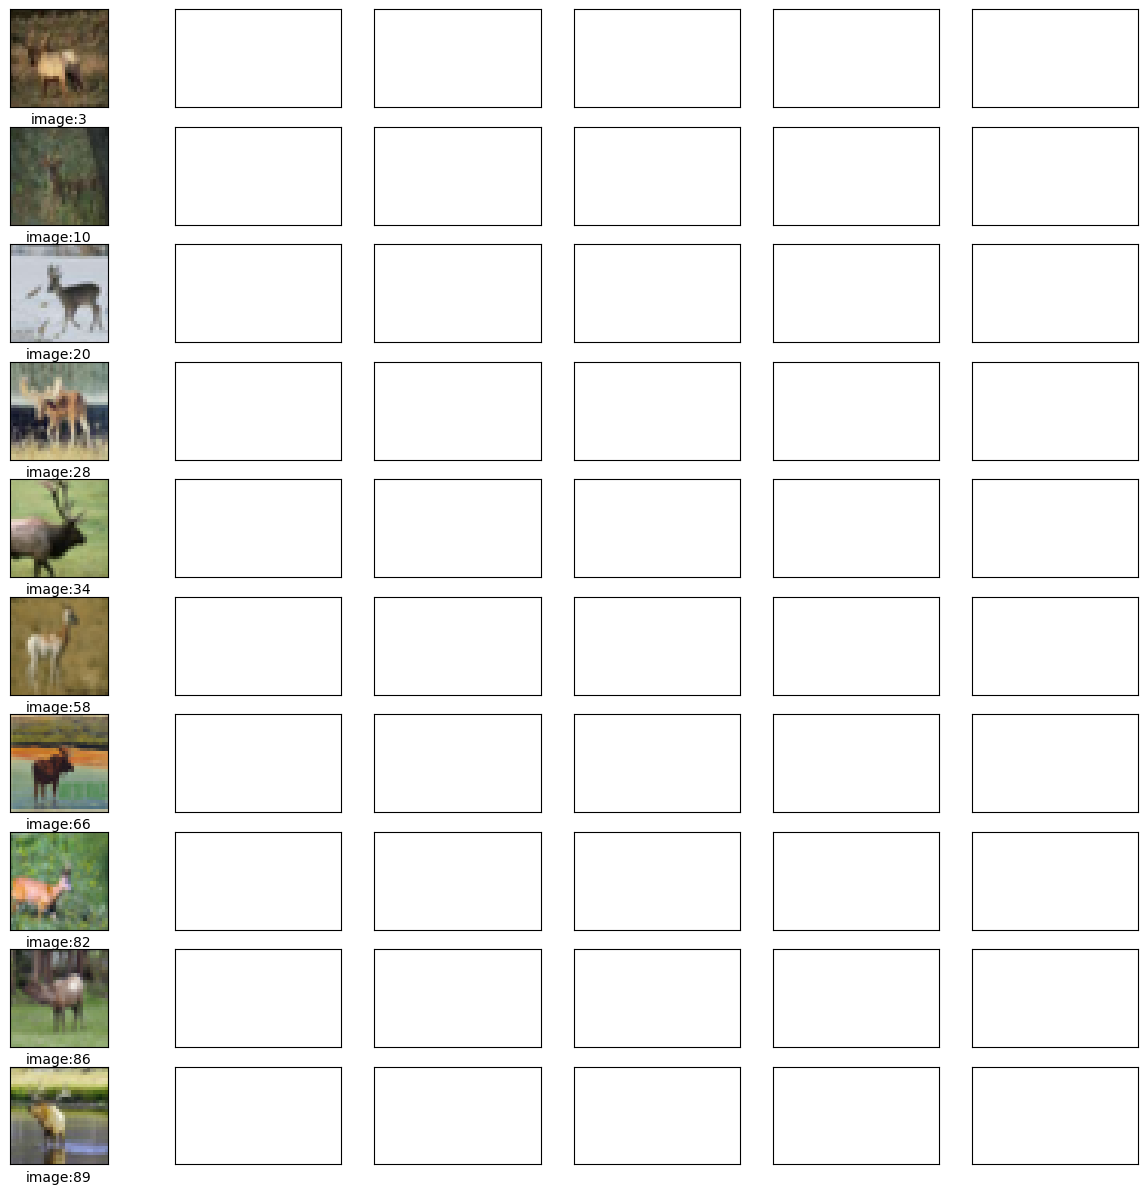

In [14]:
# Visualize feature maps - deer
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
horse_list = [i for i in range(len(train_images)) if train_labels[i] == 4]
print(len(horse_list))

print(horse_list[0:10])
train_labels[horse_list[0:10]]

f, ax = plt.subplots(10, len(layer_outputs) + 1)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])

for idx, k in enumerate(horse_list[0:10]):
    ax[idx, 0].imshow(train_images[k], cmap='viridis')
    ax[idx, 0].set_xlabel('image:' + str(k))
    for lay_ind in range(len(layer_outputs)):
        f = activation_model.predict(train_images[k].reshape(1, 32, 32, 3))[lay_ind]
        if len(f.shape) == 4:
            ax[idx, lay_ind + 1].imshow(f[0, :, :, 1], cmap='viridis')

plt.show()

# The code uses the neurons and its sequentual layers to print a list of 
# images for the deer class, the label equalling to 4

# The same observation can be made for the frog class and the horse
# class with the frog label being 6 and the horse class being 
# 7 

5000
[0, 19, 22, 23, 25, 72, 95, 103, 104, 117]
1/1 [==============================] - 0s 61ms/step


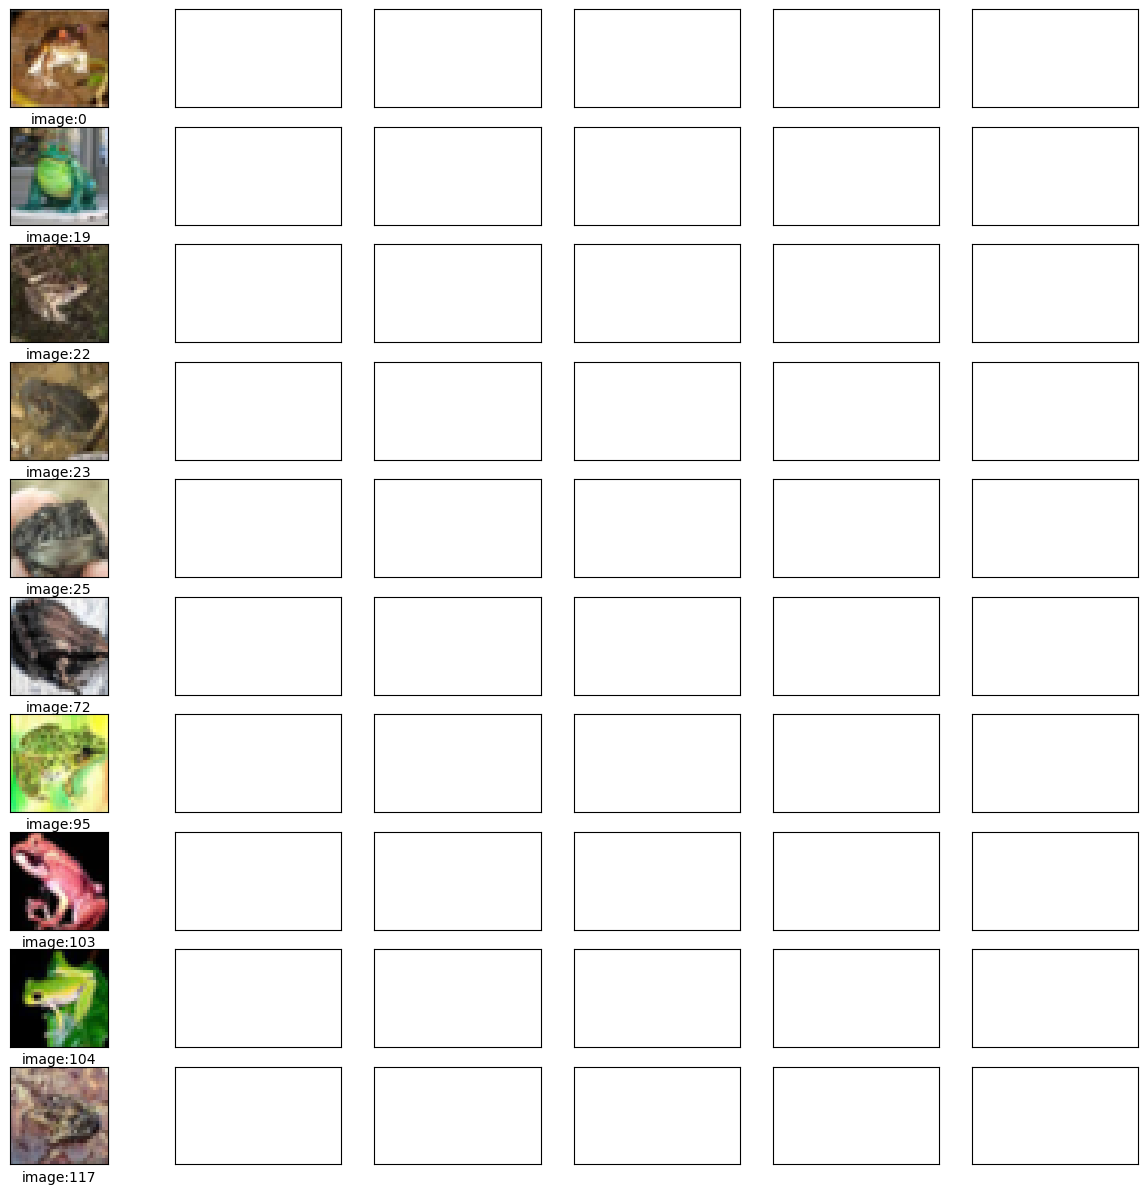

In [15]:
# Visualize feature maps - frog
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
horse_list = [i for i in range(len(train_images)) if train_labels[i] == 6]
print(len(horse_list))

print(horse_list[0:10])
train_labels[horse_list[0:10]]

f, ax = plt.subplots(10, len(layer_outputs) + 1)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])

for idx, k in enumerate(horse_list[0:10]):
    ax[idx, 0].imshow(train_images[k], cmap='viridis')
    ax[idx, 0].set_xlabel('image:' + str(k))
    for lay_ind in range(len(layer_outputs)):
        f = activation_model.predict(train_images[k].reshape(1, 32, 32, 3))[lay_ind]
        if len(f.shape) == 4:
            ax[idx, lay_ind + 1].imshow(f[0, :, :, 1], cmap='viridis')

plt.show()

5000
[7, 11, 12, 37, 43, 52, 68, 73, 84, 85]
1/1 [==============================] - 0s 46ms/step


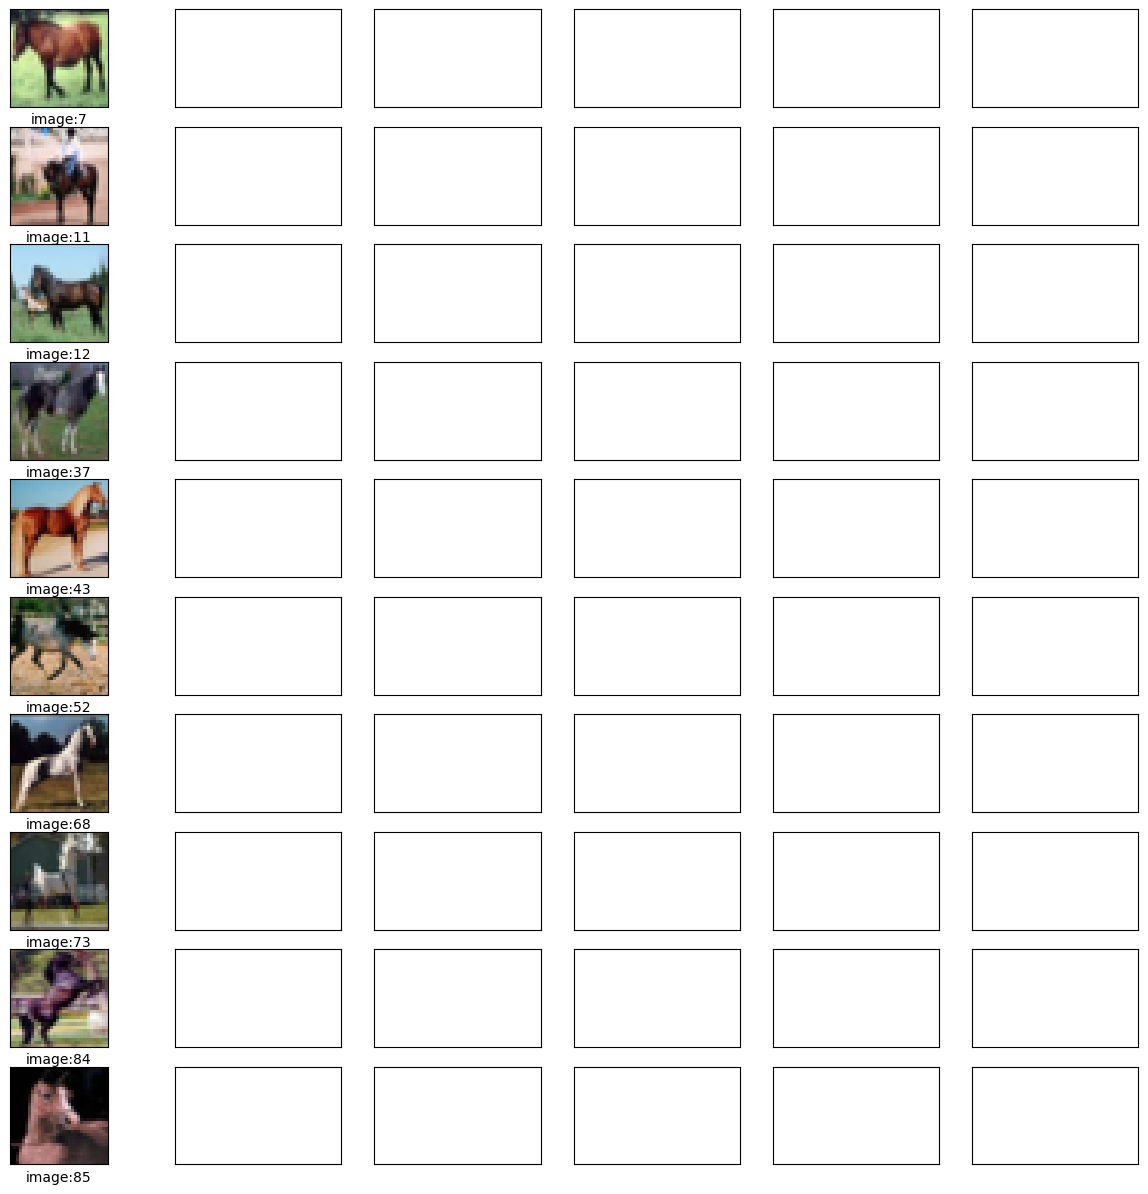

In [13]:
# Visualize feature maps - horse
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
horse_list = [i for i in range(len(train_images)) if train_labels[i] == 7]
print(len(horse_list))

print(horse_list[0:10])
train_labels[horse_list[0:10]]

f, ax = plt.subplots(10, len(layer_outputs) + 1)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])

for idx, k in enumerate(horse_list[0:10]):
    ax[idx, 0].imshow(train_images[k], cmap='viridis')
    ax[idx, 0].set_xlabel('image:' + str(k))
    for lay_ind in range(len(layer_outputs)):
        f = activation_model.predict(train_images[k].reshape(1, 32, 32, 3))[lay_ind]
        if len(f.shape) == 4:
            ax[idx, lay_ind + 1].imshow(f[0, :, :, 1], cmap='viridis')

plt.show()

In [ ]:
# Compare the dense model and CNN for advantages and limitations 

# advantages for a CNN model: 
# They are really good for extracting special features from images
# They can be highly customizable such as adjusting certain parameters
# while keeping others constant for fine tuning 
# easier to set up 

# limitations for a CNN model:
# Need large sets of data otherwise it can cause overfitting 
# Would require other resources to account for the complex computation
# time if the data set is too large or if the CNN requires a lot more
# precision for data results
# Hard to decipher how the results came out to be due to the complexity

# advantages for a dense model: 
# Much easier to understand than a CNN model since these are used for 
# non complex problems with low datasets 
# Can be used as a trial to understand the behavior of a model before 
# implementing it to a higher scale model like a CNN
# Can handel smaller datasets much better and lead to less overfitting

# limitations for a dense model: 
# Struggle with datasets that have to deal with image hierachy
# The accuracy is significantlly lower than CNN models 
# The computation times takes a little longer since it just incoporates
# neurons and the hidden layers highlighting the simplicity of dense models

# Modified CNN Model

In [5]:
# Building the modified CNN model and compiling to run it  
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# The process to create the CNN model which has three convolution layers
# that have 64 filters with size 3x3 and an activation function of 
# relu since it is more reliable than the previous sigmoid
# the first convolution layer has the input_shape of 32x32x3 to 
# be the first layer to define an image features 
# The max pooling size of 2x2 is used after each convolution layer
# to reduce computation time 
# flatten is used to convert the previous steps into a 1D vector
# The first dense layer is for high-level feature extraction
# the final dense layer is used since their are 10 classes and 
# a softmax activation function used for class probabilities 
# the adam optimizer is used to adjust learning rate during training 
# the loss function is good for when target values are integers 
# The accuracy is displayed after the model runs 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=6, batch_size=32, validation_split=0.2)

# The number of epochs is choosen since each epoch takes a little longer
# than usual to process 
# the batch size is choosen since it provides smaller computation time and
# reduce overfitting
# the validation split is used to siginify how much of the data will be 
# split into training and testing data

Epoch 1/6
1250/1250 [==============================] - 31s 24ms/step - loss: 1.8139 - accuracy: 0.4074 - val_loss: 1.4388 - val_accuracy: 0.4821
Epoch 2/6
1250/1250 [==============================] - 31s 24ms/step - loss: 1.3583 - accuracy: 0.5187 - val_loss: 1.2960 - val_accuracy: 0.5388
Epoch 3/6
1250/1250 [==============================] - 32s 25ms/step - loss: 1.2330 - accuracy: 0.5669 - val_loss: 1.1949 - val_accuracy: 0.5888
Epoch 4/6
1250/1250 [==============================] - 31s 25ms/step - loss: 1.1312 - accuracy: 0.6041 - val_loss: 1.2003 - val_accuracy: 0.5854
Epoch 5/6
1250/1250 [==============================] - 32s 25ms/step - loss: 1.0483 - accuracy: 0.6349 - val_loss: 1.1370 - val_accuracy: 0.6179
Epoch 6/6
1250/1250 [==============================] - 32s 25ms/step - loss: 0.9780 - accuracy: 0.6591 - val_loss: 1.0631 - val_accuracy: 0.6328


In [112]:
# Save modified CNN model
model.save('modified_CNN_model')

# Code to load the data for future comparison
# loaded_model_2 = tf.keras.models.load_model('modified_CNN_model')

INFO:tensorflow:Assets written to: modified_CNN_model\assets


INFO:tensorflow:Assets written to: modified_CNN_model\assets


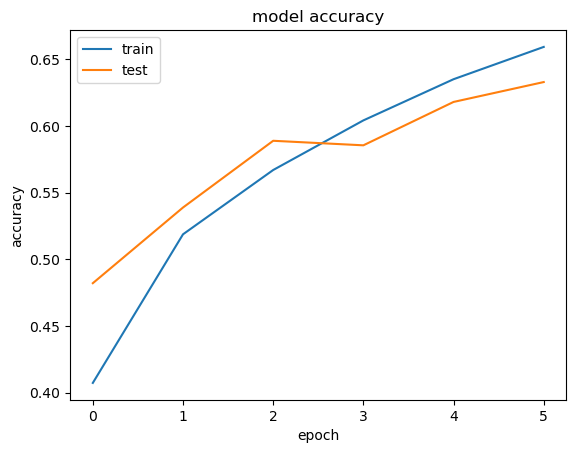

In [12]:
# Model accuracy as a plot for the train and test
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# The graph takes the accuracy data from the epoch runs and displays it visually
# The mode is overfitting quite substantially since there is a large
# gap between the training and testing data at later epochs 
# so the model is not the best at recognizing unseen, testing, data.
# It is the same general shape when compared to the CNN model with the exception 
# to changes in the loss and accuracy values

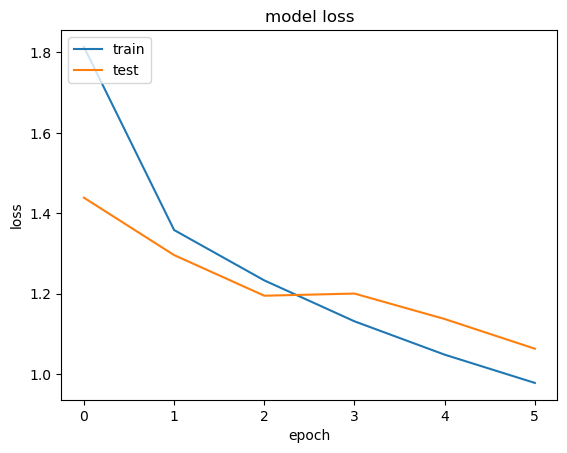

In [8]:
# Model loss over epochs as a plot for the train and test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# the model is overfitting by a significant amount since 
# at later epochs, there is a large gap between the two 
# this suggests that model can preform well on the training data 
# rather than the testing data
# The only difference with the CNN model is the values for loss are higher and 
# accuracy are lower. The general shape of the loss graph is similar the CNN 

In [9]:
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

predictions = model.predict (test_images)
print(predictions.shape, test_labels.shape)

# There is a high test loss accuracy meaning that the model's predictions
# are not matching the actual data
# The test accuracy means that the model is predicting somewhat well 
# on the test samples
# The predictions signify that there are 10,000 test samples for 10 
# possible classes and each sample getting one prediction value. 
# The same can be said for the CNN model. The only difference is the values for the loss and 
# accuracy as well as the computation time to obtain the values. 

313/313 [==============================] - 2s 7ms/step - loss: 1.0960 - accuracy: 0.6211
Test Loss: 1.095983862876892
Test Accuracy: 0.6211000084877014
313/313 [==============================] - 2s 7ms/step
(10000, 10) (10000, 1)


In [10]:
# Show the confusion matrix
cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print(cm)

# The matrix shows the diagonal column as the classes and how many 
# the model gets rights while the other values in the rows and columns
# suggest the model getting the image wrong with the respective class
# and what the model actually predicted. 
# With the CNN model, the accuracy is higher so the CNN model can predict more of the class of image
# and have fewer wrong than the modified however it is a minimal difference 

[[664  30 106  19  18  14  13  17  83  36]
 [ 34 823  14   6   4  14  12   6  27  60]
 [ 62   8 623  75  41  73  69  29  12   8]
 [ 20  17 133 390  48 231  84  43  11  23]
 [ 28  10 203  85 433  62  70 100   6   3]
 [ 18   7  99 155  35 579  42  52   4   9]
 [ 12   5  99  71  37  41 709  11   7   8]
 [ 19   8  64  41  57 118   9 669   2  13]
 [145  73  27  16   7   6   9   7 676  34]
 [ 46 158  16  26   6  25  12  30  36 645]]


In [11]:
# Show the classification report
cr = classification_report(test_labels, np.argmax(predictions, axis=1))
print(cr)

# The report shows the accuracy for each class based on several 
# types of classifications, precision, recall, f1-score, and support. 
# The scores overall for the modified CNN are lower than the CNN but only but a little bit

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1000
           1       0.72      0.82      0.77      1000
           2       0.45      0.62      0.52      1000
           3       0.44      0.39      0.41      1000
           4       0.63      0.43      0.51      1000
           5       0.50      0.58      0.54      1000
           6       0.69      0.71      0.70      1000
           7       0.69      0.67      0.68      1000
           8       0.78      0.68      0.73      1000
           9       0.77      0.65      0.70      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000



5000
[3, 10, 20, 28, 34, 58, 66, 82, 86, 89]
1/1 [==============================] - 0s 32ms/step


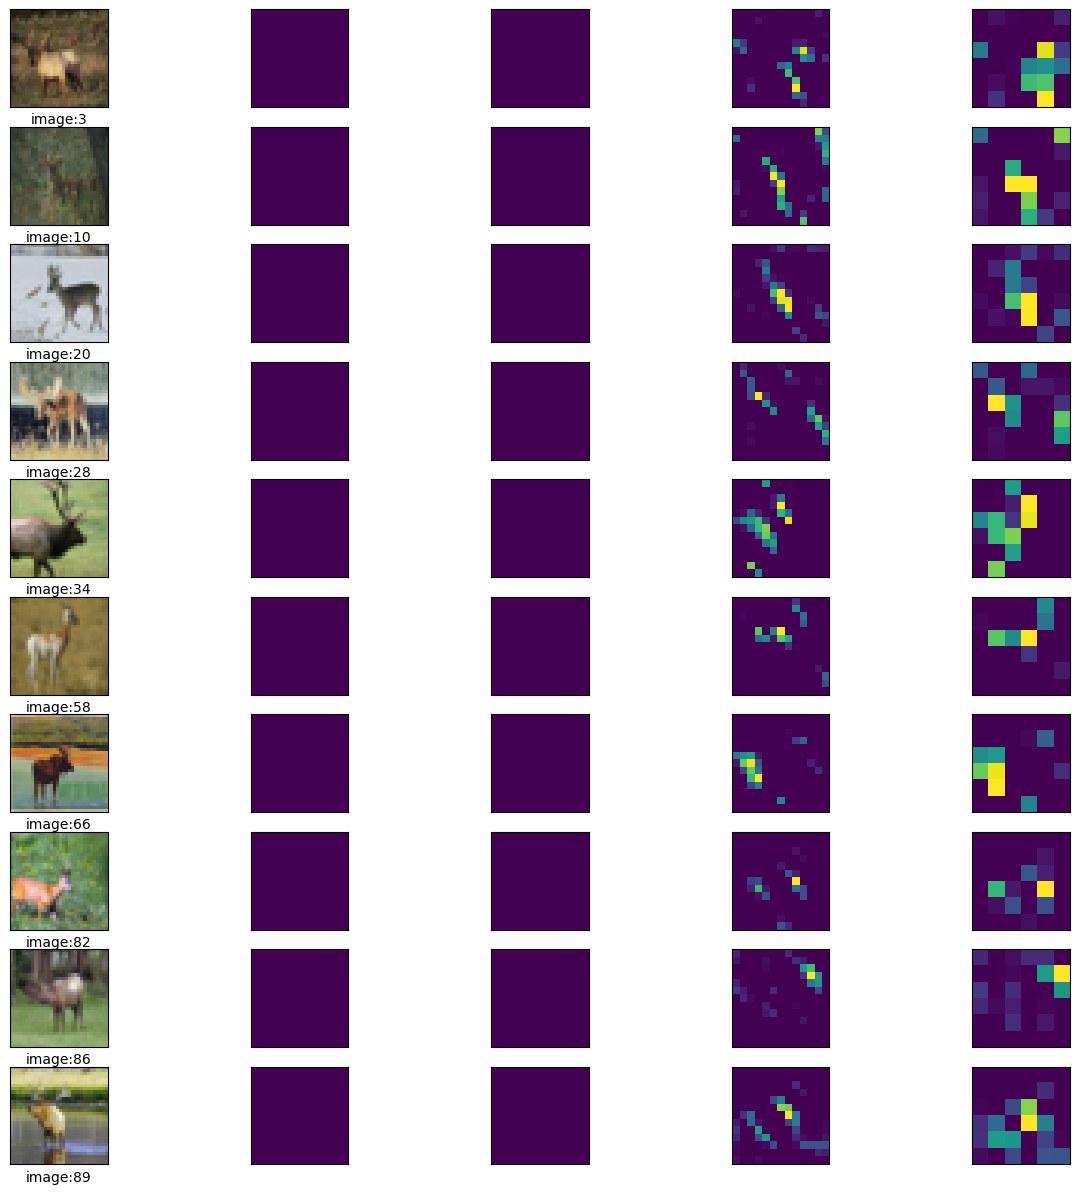

In [118]:
# Visualize feature maps - deer
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
deer_list = [i for i in range(len(train_images)) if train_labels[i] == 4]
print(len(deer_list))

print(deer_list[0:10])
train_labels[deer_list[0:10]]

np.argmax(model.predict(train_images[deer_list[0:10]]), axis=1)

f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])

for idx, k in enumerate(deer_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='viridis')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32, 32, 3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='viridis')
        
# The code takes the intermediate layers and prints a list of the 
# images for the deer class, the label equalling to 4
# The subplot for each image is included and it shows the color map 
# the output shows the 4 intermediate layers and 
# how the model uses the pixles for each layer to get more 
# and more like the image shown in the far left

# The same observation can be made for the frog class and the horse
# class with the frog label being 6 and the horse class being 
# 7. 

# The observation for the modified CNN is that the pixles are not shown for the first two layers which signifies that
# the addition of a convolution layer deems the other two layers not as important when deciphering hte 
# pixles into its respective images for each layer and have no significant impact

5000
[0, 19, 22, 23, 25, 72, 95, 103, 104, 117]
1/1 [==============================] - 0s 32ms/step


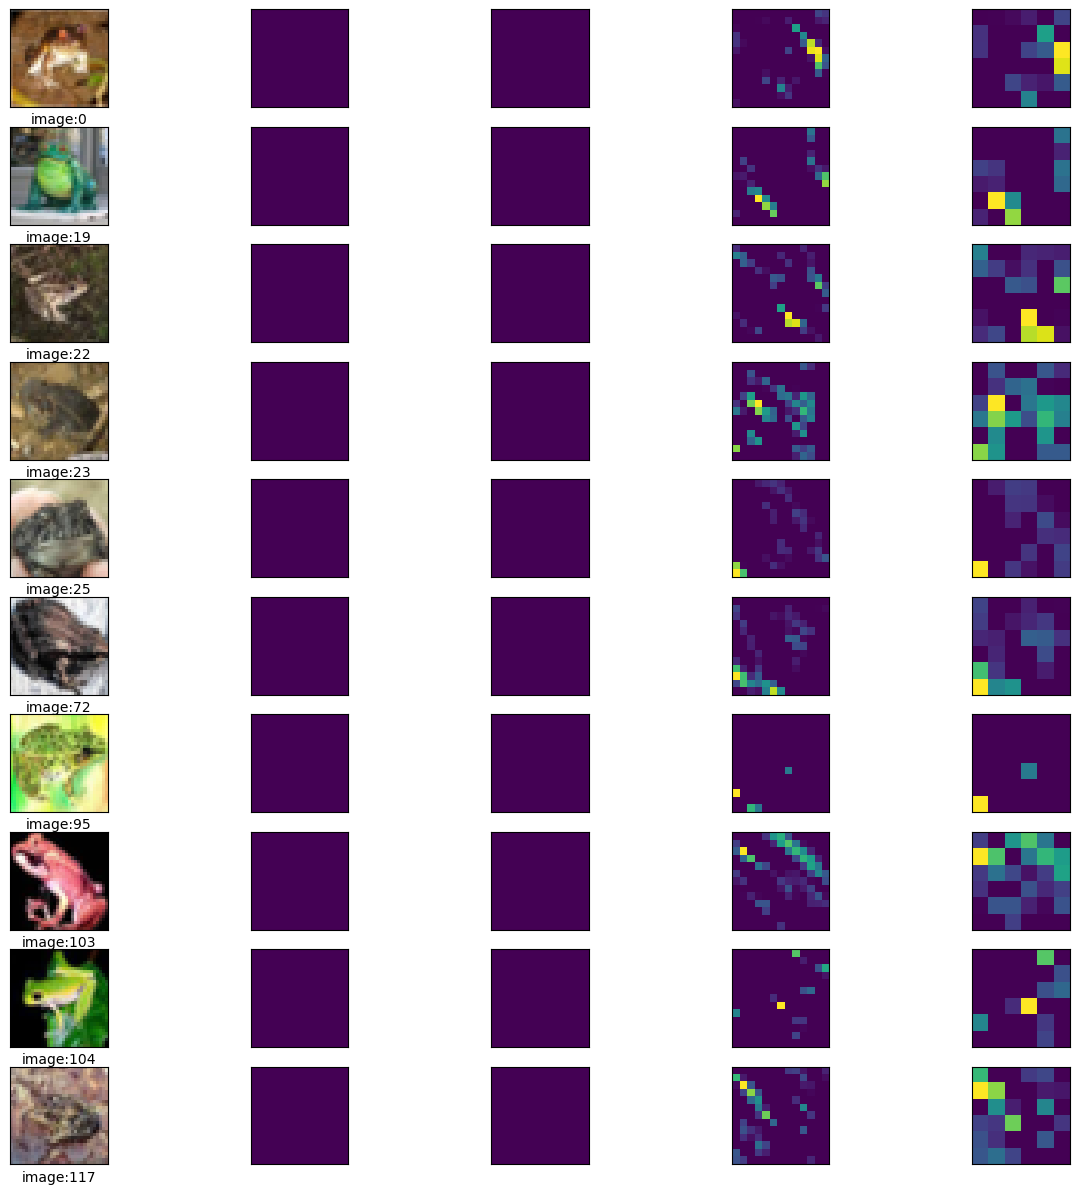

In [119]:
# Visualize feature maps - frog
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
frog_list = [i for i in range(len(train_images)) if train_labels[i] == 6]
print(len(frog_list))

print(frog_list[0:10])
train_labels[frog_list[0:10]]

np.argmax(model.predict(train_images[frog_list[0:10]]), axis=1)

f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])

for idx, k in enumerate(frog_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='viridis')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32, 32, 3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='viridis')

5000
[7, 11, 12, 37, 43, 52, 68, 73, 84, 85]
1/1 [==============================] - 0s 33ms/step


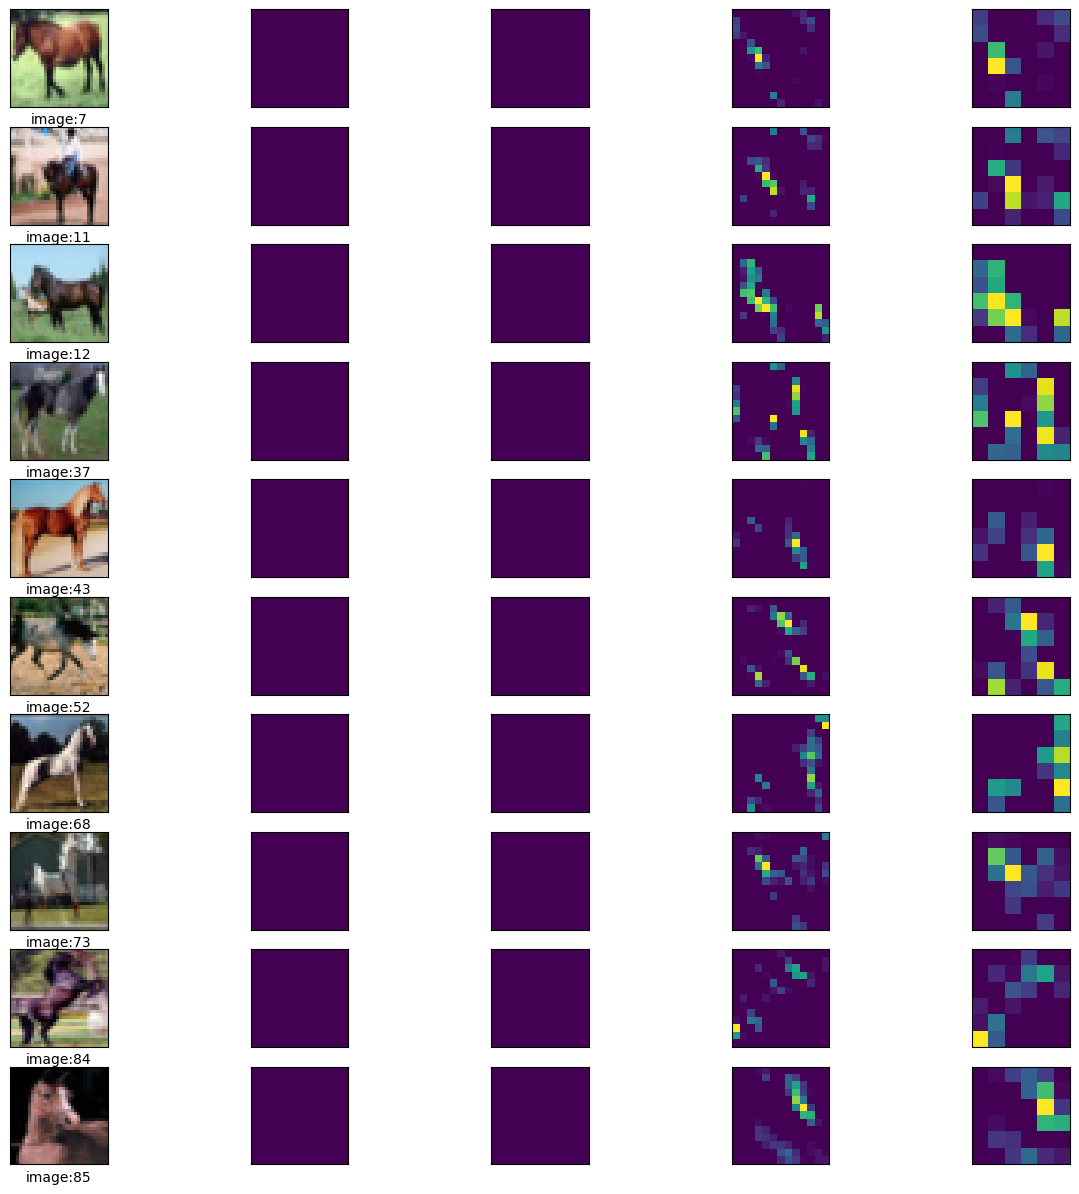

In [120]:
# Visualize feature maps - horse
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
horse_list = [i for i in range(len(train_images)) if train_labels[i] == 7]
print(len(horse_list))

print(horse_list[0:10])
train_labels[horse_list[0:10]]

np.argmax(model.predict(train_images[horse_list[0:10]]), axis=1)

f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])

for idx, k in enumerate(horse_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='viridis')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32, 32, 3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='viridis')

In [ ]:
# What the modified CNN did to the CNN 
# One improvement that the modified CNN had was that it was able 
# to extract the image features better than the CNN since the 
# modified CNN did not take all the intermediate layers to figure out
# what the image was compared to the CNN model not being 
# able to extract image features over the course of more intermediate 
# layers 

# With an addition of a layer, the hyperparameter tunings may need to be 
# adjusted which can lead to more overfitting than a CNN model if not careful
# sometimes the addition of a layer may not lead to better performance.
# Initially, I though adding a layer would increase the accuracy 
# but in reality, it lowered it be a tiny bit. 

## DUE DATE: Monday, October 23, 2023